In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon


In [3]:
path = "../Data/coral_watch_ala/data.xlsx"

In [4]:
df = pd.read_excel(path, sheet_name="CoralWatch Random Survey")

/home/ziad/anaconda3/envs/ShallowLearn/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [6]:
gdf['Observation date'] = pd.to_datetime(gdf['Observation date'])

In [7]:
gdf['Site Name'].unique()

array(['Fitzroy Island, Great Barrier Reef (QLD), Australia',
       'Mackay Reef, Great Barrier Reef (QLD), Australia',
       'Green Island, Great Barrier Reef (QLD), Australia',
       'Ribbon Reef No 3, Flare Point, Great Barrier Reef (QLD), Australia',
       'Ribbon Reef No 9 and 1/2, Great Barrier Reef (QLD), Australia',
       'John Brewer Reef, Great Barrier Reef (QLD), Australia',
       'Magnetic Island, Arthur Bay , Great Barrier Reef (QLD), Australia',
       'Lizard Island, Great Barrier Reef (QLD), Australia',
       'Magnetic Island, Geoffrey Bay, Great Barrier Reef (QLD), Australia',
       'Sudbury Reef, Great Barrier Reef (QLD), Australia',
       'Hastings Reef, Great Barrier Reef (QLD), Australia',
       'Hook Island, Stonehaven Bay, Whitsunday Islands, Great Barrier Reef (QLD), Australia',
       '20-019b, Langford Island, Great Barrier Reef (QLD), Australia',
       'Lady Elliot Island, Lagoon, Great Barrier Reef (QLD), Australia',
       'Lady Musgrave Island, 

In [8]:
gdf_2015 = gdf[gdf['Observation date'] >'2014-12-31']

In [9]:
print(gdf_2015.crs)

None


In [10]:
top_left_y, top_left_x = -14.4626,145.1453

In [11]:
btm_right_y, btm_right_x = -15.4558,146.1558

In [12]:
bbox = box(top_left_x, top_left_y, btm_right_x, btm_right_y)

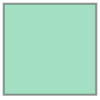

In [13]:
bbox

In [14]:
subset_gdf_2015 = gdf_2015.cx[bbox.bounds[0]: bbox.bounds[2], bbox.bounds[1]: bbox.bounds[3]]

In [15]:
subset_gdf_2015 = subset_gdf_2015.set_crs('EPSG:4326')

In [16]:
tiff_path = "/run/media/ziad/Expansion/Clipped_Reefs_By_Image/T55LCD_20170721T003709no_transform/6847_T55LCD_20170721T003709no_transform.tiff"
with rasterio.open(tiff_path) as src:
    # transform the given longitude and latitude to the coordinate system of the raster
    dst_crs = src.crs


In [17]:
subset_gdf_2015.to_crs(src.crs)

,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,Verification status,Latitude,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
180,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,1,E3,E4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
181,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,2,D3,D4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
182,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,3,D4,D5,4.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
183,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,4,D2,D4,3.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
184,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,5,D2,D4,3.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89259,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,13,D3,D4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89260,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,14,C3,C4,3.5,Plate corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89261,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,15,C5,C6,5.5,Plate corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89262,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary .

In [18]:
# get the bounds of the raster
raster_bounds = src.bounds
# create a shapely polygon object from the bounding box
polygon = Polygon([(raster_bounds.left, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.top), 
                    (raster_bounds.left, raster_bounds.top)])
# check if the point is within the bounds of the raster
#is_within_bounds = pnt_.within(polygon)

In [19]:
unique_locations = subset_gdf_2015.groupby(['Longitude', 'Latitude']).first().reset_index()


In [20]:
unique_locations = unique_locations.set_crs('EPSG:4326')
unique_locations = unique_locations.to_crs(src.crs)

In [61]:

def get_raster_values(raster_file, pnt):
    values = {}
    with rasterio.open(raster_file) as src:
        # transform the given longitude and latitude to the coordinate system of the raster
        dst_crs = src.crs
        bounds = src.bounds
        polygon = Polygon([(bounds.left, bounds.bottom), 
                            (bounds.right, bounds.bottom), 
                            (bounds.right, bounds.top), 
                            (bounds.left, bounds.top)])
        is_within_bounds = pnt.within(polygon)
        # check if the transformed coordinates are within the bounds of the raster file
        if not is_within_bounds:
            return None
        # read the pixel values from each band
        print("Operation succesful")
        lon, lat = pnt.x, pnt.y
        for band_num in range(1, src.count+1):
            row, col = src.index(lon, lat)
            band_data = src.read(band_num, window=((row, row+1), (col, col+1)))
            values[f'band_{band_num}'] = band_data[0][0]
    return values

In [58]:
import os
import glob

# specify the directory path
dir_path = '/run/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [59]:
unique_locations.head()

,Longitude,Latitude,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
0,145.280899,-15.167600,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,91bdc083-34ea-40ed-a6ad-bbb27e0e626b,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D4,D2,3.0,Boulder corals,None,None,"CustomChartDataItem|||2|||5,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (315304.463 8322411.447)
1,145.415298,-15.415416,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,bdd29a75-5c89-4de0-acc8-431a1c02dbcc,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B3,B3,3.0,Boulder corals,None,None,"CustomChartDataItem|||2|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||10,Cust...",POINT (329947.319 8295101.081)
2,145.416702,-15.404000,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,06ae88a7-a491-47b1-b877-4ba79c6596aa,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,C1,C5,3.0,Boulder corals,None,None,"CustomChartDataItem|||1|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||16,Cust...",POINT (330088.736 8296365.312)
3,145.416702,-15.048440,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,ad102034-8884-4828-8bc0-cf694596bc05,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B3,B5,4.0,Boulder corals,None,None,"CustomChartDataItem|||1|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||18,Cust...",POINT (329803.151 8335705.647)
4,145.418106,-15.416373,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,b559de1a-4ae3-4385-9de4-8d9d71684caf,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B2,B2,2.0,Boulder corals,None,None,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (330249.486 8294997.408)


In [69]:
# Not working yet
fname_dict = {}
for file in dir_list:
    for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
        spectral_sig = get_raster_values(file, pnt)
        if spectral_sig is None:
            continue
        if id in fname_dict.keys():
            fname_dict[id].append({file:spectral_sig})
        else:
            fname_dict[id] = [{file:[spectral_sig]}]


Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful


In [73]:
for keys in fname_dict.keys():
    print(keys)

Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia
Palfrey Reef, Great Barrier Reef (QLD), Australia
Lizard Island, Palfrey Island, South Flat, Great Barrier Reef (QLD), Australia
Lizard Island, Loomis Reef, Great Barrier Reef (QLD), Australia
Lizard Island, Great Barrier Reef (QLD), Australia
Lizard Island, Watsons Bay, Great Barrier Reef (QLD), Australia
Lizard Island, Mermaid Cove, Great Barrier Reef (QLD), Australia
Lizard Island, Seabird Islet, Great Barrier Reef (QLD), Australia


In [76]:
(fname_dict["Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia"])

[{'/run/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff': [{'band_1': 1670,
    'band_2': 1602,
    'band_3': 1199,
    'band_4': 361,
    'band_5': 276,
    'band_6': 231,
    'band_7': 222,
    'band_8': 164,
    'band_9': 52,
    'band_10': 5,
    'band_11': 91,
    'band_12': 67,
    'band_13': 184}]},
 {'/run/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160721T004002no_transform.tiff': {'band_1': 1534,
   'band_2': 1453,
   'band_3': 1092,
   'band_4': 312,
   'band_5': 245,
   'band_6': 200,
   'band_7': 188,
   'band_8': 152,
   'band_9': 46,
   'band_10': 7,
   'band_11': 75,
   'band_12': 61,
   'band_13': 161}},
 {'/run/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160820T003712no_transform.tiff': {'band_1': 1675,
   'band_2': 1669,
   'band_3': 1209,
   'band_4': 403,
   'band_5': 327,
   'band_6': 299,
   'band_7': 287,
   'band_8': 254,
   'band_9': 86,
   'band_10': 23,
   'band_11': 169,
   'band_12': 121,

In [105]:
def dict_to_dataframe(key, data_dict):
    """
    Takes in a key and a dictionary and returns a pandas dataframe with the
    keys as the index row, headers as the column headers, and values as values.
    """
    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data_dict, orient='index').T
    
    # Set the index name to the given key
    
    # Reset the column headers
    df.columns = range(len(df.columns))
    
    return df

In [110]:
stacked_df = pd.DataFrame()
for i in fname_dict["Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia"]:
    try:
        df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0][0])
    except:
        df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0])
    df['fname'] = list(i.keys())[0]
    stacked_df = pd.concat([stacked_df, df])

In [113]:
for name in stacked_df.fname:
    print(name)
    break

/run/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff


In [116]:
stacked_df['date_col'] = stacked_df['fname'].str.extract(r'_(\d{8})', expand=False)

In [119]:
stacked_df['date_col'] = pd.to_datetime(stacked_df['date_col'], format='%Y%m%d')

In [121]:
stacked_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,fname,date_col
0,1670,1602,1199,361,276,231,222,164,52,5,91,67,184,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2016-07-11
0,1534,1453,1092,312,245,200,188,152,46,7,75,61,161,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2016-07-21
0,1675,1669,1209,403,327,299,287,254,86,23,169,121,254,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2016-08-20
0,1694,1615,1301,463,373,337,331,277,62,5,193,138,283,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2016-09-09
0,1521,1526,1240,441,350,309,321,276,53,5,197,145,285,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2017-03-08
0,7858,7252,7147,7412,7049,7163,7442,6770,2317,14,2878,1538,7634,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2017-05-07
0,1672,1587,1228,378,276,224,211,169,49,4,88,74,172,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2017-07-06
0,1673,1383,1082,377,288,243,227,185,58,11,106,84,191,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2017-07-16
0,1562,1488,1154,393,316,299,287,247,69,12,159,115,249,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2018-05-02
0,1587,1556,1171,371,282,246,239,189,63,6,101,86,191,/run/media/ziad/Expansion/Cleaned_Data_Directo...,2018-07-31


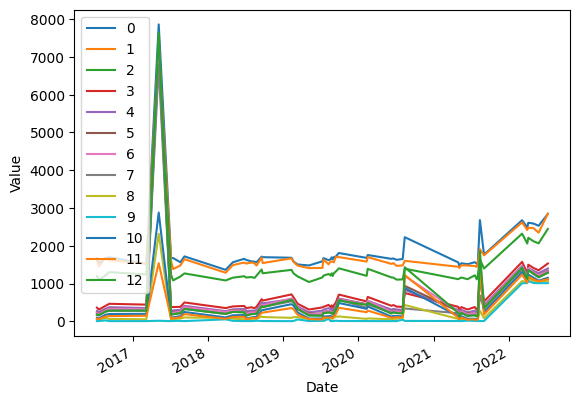

In [126]:
import matplotlib.pyplot as plt

# Set the index of the dataframe to the date column

#stacked_df.set_index('date_col', inplace=True)

# Create a line plot of the dataframe
stacked_df.plot(kind='line')

# Set the x label to 'Date'
plt.xlabel('Date')

# Set the y label to 'Value'
plt.ylabel('Value')

# Show the plot
plt.show()

In [135]:
stacked_df.reset_index(inplace = True)

In [165]:
band_data = stacked_df.select_dtypes(include=['uint16'])

In [170]:
horse_shoe = subset_gdf_2015[subset_gdf_2015['Site Name'] == "Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia"]

In [175]:
horse_shoe[]

59196    3.5
59197    3.5
59198    3.0
59199    3.0
59200    1.0
        ... 
59686    3.0
59687    2.5
59688    2.0
59689    2.0
59690    3.5
Name: Average., Length: 308, dtype: float64

In [176]:
horse_shoe[['Observation date', 'Average.']]

,Observation date,Average.
59196,2016-03-23,3.5
59197,2016-03-23,3.5
59198,2016-03-23,3.0
59199,2016-03-23,3.0
59200,2016-03-23,1.0
...,...,...
59686,2016-03-16,3.0
59687,2016-03-16,2.5
59688,2016-03-16,2.0
59689,2016-03-16,2.0


In [177]:
horse_shoe['Observation date'].unique()

array(['2016-03-23T00:00:00.000000000', '2016-03-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

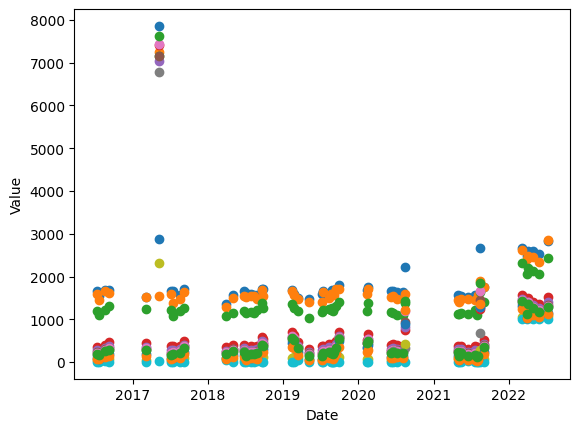

In [167]:
# Create a scatter plot of the dataframe
fig, ax = plt.subplots()
for col in band_data.columns:
    ax.scatter(stacked_df['date_col'], band_data[col])

# Set the x label to 'Date'
ax.set_xlabel('Date')

# Set the y label to 'Value'
ax.set_ylabel('Value')

# Show the plot
plt.show()

In [45]:
spectral_sig = get_raster_values(file, pnt)

In [51]:
output_test = gpd.GeoDataFrame(index=[0], crs=src.crs, geometry=[spectral_sig]) 

In [52]:
output_test.to_file("../Data/Lizard_test.shp")

In [39]:
fname_dict

{}

In [25]:
for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
    print(pnt, id)

POINT (315304.4627402294 8322411.446601819) Lizard Island, Watsons Bay, Great Barrier Reef (QLD), Australia
POINT (329947.3186976809 8295101.081160216) Boulder Reef, D-7, Great Barrier Reef (QLD), Australia
POINT (330088.736314313 8296365.311968818) Egret Reef, 205, Great Barrier Reef (QLD), Australia
POINT (329803.1512277748 8335705.646823901) Egret Reef, 209, Great Barrier Reef (QLD), Australia
POINT (330249.4857698097 8294997.408347715) Boulder Reef, S-16, Great Barrier Reef (QLD), Australia
POINT (330280.6490671112 8295445.994569834) Boulder Reef, S-12, Great Barrier Reef (QLD), Australia
POINT (330537.7927788411 8293431.378971329) Boulder Reef, D-1, Great Barrier Reef (QLD), Australia
POINT (330559.96702089114 8296879.862259328) Boulder Reef, D-6, Great Barrier Reef (QLD), Australia
POINT (331525.64513379807 8294066.213836609) Boulder Reef, S-2, Great Barrier Reef (QLD), Australia
POINT (331558.7848704159 8296486.708629119) Egret Reef, 204, Great Barrier Reef (QLD), Australia
POIN

In [30]:
unique_locations.dtypes

Longitude                                                     float64
Latitude                                                      float64
Project ID                                                     object
Project Activity ID                                            object
Activity ID                                                    object
Start date                                                     object
End date                                                      float64
Description                                                    object
Status                                                         object
Attribution                                                    object
Verification status                                            object
Centroid Latitude                                             float64
Centroid Longitude                                            float64
Site Name                                                      object
Site External Id    

In [32]:
unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")

/tmp/ipykernel_100987/3108358576.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")


In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set up the map projection
fig = plt.figure(figsize=(10, 10))
xmin, ymin, xmax, ymax = unique_locations.total_bounds
m = Basemap(projection='merc', llcrnrlon=xmin, llcrnrlat=ymin, urcrnrlon=xmax, urcrnrlat=ymax, resolution='l')

# Add the bathymetric data as a background
m.etopo()

# Plot the GeoDataFrame on top of the bathymetry
m.plot(unique_locations.geometry.x, gdf.geometry.y, 'o', markersize=5, color='red', latlon=True)

# Add map features like coastlines and borders
m.drawcoastlines()
m.drawcountries()

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [27]:
!conda install -c conda-forge basemap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                     \                                    | |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - appdirs -> python[version='2.7.*|3.5.*|3.6.*|3.4.*|>=3.5,<3.6.0a0|>=2.7,<2.8.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']
  - argon2-cffi-bindings=21.2.0 -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|3.7.10|3.7.10|3.7.12|3.8.12|3.8.16|3.9.16|3.9.10|>=3.6,<3.7.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0

In [ ]:
-14.745567,145.511548

In [89]:
y, x= -14.7385,145.5110

In [123]:
# create a point object with coordinates (x, y)
point = Point(x, y)

In [142]:
print(point)

POINT (145.511 -14.7385)


In [121]:
pnt_ in src.bounds

False

In [101]:
transform_geom('EPSG:4326', dst_crs, point)

{'type': 'Point', 'coordinates': (339712.68381670944, 8370066.7770678485)}

In [96]:
dst_crs

CRS.from_epsg(32755)

In [95]:
lon, lat

(339712.68381670944, 8370066.7770678485)

In [144]:
pnt_ = Point(339729.4,8369227.1)

In [153]:
pnt_.x

339729.4

In [155]:
get_raster_values(tiff_path, pnt_)

{'band_1': 1934,
 'band_2': 1663,
 'band_3': 1462,
 'band_4': 1258,
 'band_5': 1315,
 'band_6': 1751,
 'band_7': 2004,
 'band_8': 1918,
 'band_9': 635,
 'band_10': 398,
 'band_11': 1442,
 'band_12': 955,
 'band_13': 2128}

In [26]:

get_raster_values(tiff_path, x, y)

{'band_1': 2072,
 'band_2': 1850,
 'band_3': 1756,
 'band_4': 1708,
 'band_5': 1915,
 'band_6': 2471,
 'band_7': 2794,
 'band_8': 2672,
 'band_9': 755,
 'band_10': 403,
 'band_11': 2601,
 'band_12': 1541,
 'band_13': 3064}